'Test Sheet: Predicting Employee Salaries Based on Experience and Education Using Linear Regression'
-

'Scenario
- Objective In this assignment, you will build and evaluate a Linear Regression model to predict employee salaries based on their years of experience and education level. You will use Python's Scikit-Learn library to train the model, assess its performance, and make salary predictions.


- Scenario A company wants to determine an employee's salary based on their years of experience and education level. The company has historical data on employees’ salaries, experience, and education. Your task is to create a model that accurately predicts employee salaries using this information.


- Features (Inputs):

-Years of Experience: (e.g., 1, 5, 10, etc.)
-Education Level:
    1 for Bachelor's
    2 for Master's
    3 for PhD
-Target (Output):
    Salary: (continuous value in dollars)

'Step by step instructions'
-
- 1. Generate or Load Data:
Generate a synthetic dataset with the following columns:
experience: Years of experience (integer values, e.g., 1 to 20).
education_level: Education level (1 for Bachelor's, 2 for Master's, 3 for PhD).
salary: Continuous salary value (target variable).
    # Generate values using random --> catch
2. Data Preprocessing:
Split the dataset into features (experience, education_level) and target (salary).
Perform an 80/20 split to create training and test datasets.
3. Train the Linear Regression Model:
Train a Linear Regression model on the training data.
4. Evaluate the Model:
Evaluate the model on the test data using

Mean Squared Error (MSE) and
R-squared (R²) values.
5. Make Predictions:
Use the trained model to predict the salary of a new employee.
Example: Predict the salary for an employee with 7 years of experience and a Master's degree (education level = 2).
6. Visualizations (Optional):
Create scatter plots to visualize the relationship between experience, education, and salary.
Plot the model's predictions against the actual salary data.

In [8]:
import numpy as np # generate or load data
import pandas as pd

# Generate synthetic data
np.random.seed(42) # generating values using random
experience = np.random.randint(1, 21, size=100)
education_level = np.random.choice([1, 2, 3], size=100)
salary = (experience * 3000) + (education_level * 10000) + np.random.normal(0, 5000, 100)

# Create DataFrame
df = pd.DataFrame({
    'experience': experience,
    'education_level': education_level,
    'salary': salary
})

df.head()

,experience,education_level,salary
0,7,3,48126.453962
1,20,2,77892.508898
2,15,3,76699.104821
3,11,3,62963.099250
4,8,1,37836.484194


In [12]:
from sklearn.model_selection import train_test_split # data preprocessing, split the data into features(experience, education_level) and target (salary), followed by 80/20 split to create training and test datasets.


# Features (X) and target (y)
X = df[['experience', 'education_level']] 
y = df['salary']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# now, we are training the linear regression model
from sklearn.linear_model import LinearRegression # train the linear regression model on the training data

# Initialize and train the model.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Evaluaing the model on the test data using 1. Mean Squared Error(MSE) AND R^2 values
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 27136006.687267862
R-squared: 0.9208841886639852


In [18]:
# making Predictions , Use the trained model to predict the salary of a new employee. Use the condition given in the problem, 7 years of experience, Masters degree
new_employee = np.array([[7, 2]])  # 7 years of experience, Master's degree
predicted_salary = model.predict(new_employee)

print(f"Predicted Salary for 7 years experience and Master's degree: ${predicted_salary[0]:,.2f}") # .2f is for 2 decimals after points.

Predicted Salary for 7 years experience and Master's degree: $42,377.80


C:\Users\vipan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Now, we are going to visualize the data, Create scatter plots to visualize the relationship between experience, education, and salary.
Plot the model's predictions against the actual salary data.

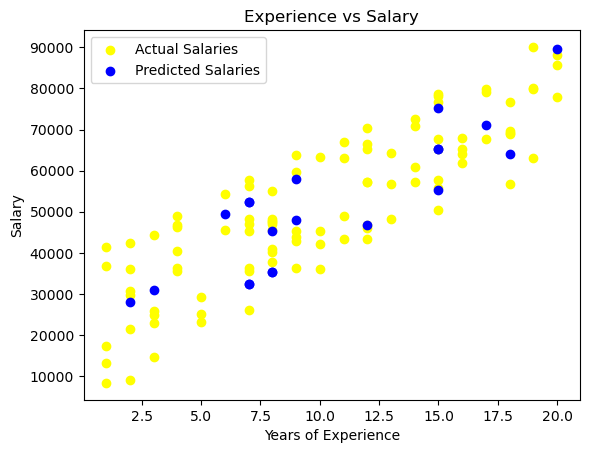

In [21]:
import matplotlib.pyplot as plt

# Scatter plot for experience vs salary
plt.scatter(df['experience'], df['salary'], color='yellow', label='Actual Salaries')
plt.scatter(X_test['experience'], y_pred, color='blue', label='Predicted Salaries')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.legend()
plt.show()